## Create Simulation Cell for the InSe Paper

In [1]:
import os
import abtem
import ase.io
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from ase.build import surface
from abtem.atoms import pretty_print_transform

from FunctionPackageOM import User_Functions, Ollis_Functions
from FunctionPackageOM.Plot_Style import Plot_Style_OM_activate


# Load custom plot style
Plot_Style_OM_activate(white_bkg_for_visualization=True)

# Note: This line is specific to Jupyter Notebooks
# Uncomment if running in Jupyter
get_ipython().run_line_magic('matplotlib', 'ipympl')



In [2]:
## import the CIF files

fpCIF = '//masc_shared/ag_volz/Oliver_Maßmeyer/CIF_Files'
fnInSe = 'InSe_mp-20485_symmetrized_beta-2H.cif'
fnAl2O3 = 'Al2O3.cif'

InSeAtoms = ase.io.read(os.path.join(fpCIF,fnInSe))
Al2O3Atoms = ase.io.read(os.path.join(fpCIF,fnAl2O3))

Text(0.5, 0.98, 'sapphire_cell')

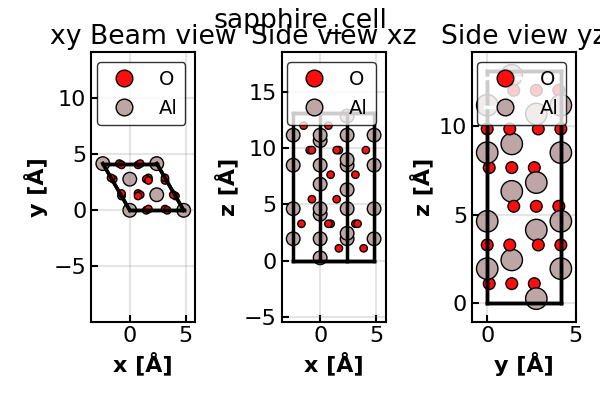

In [3]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3Atoms, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3Atoms, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3Atoms, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('sapphire_cell')

Text(0.5, 0.98, 'InSe_cell')

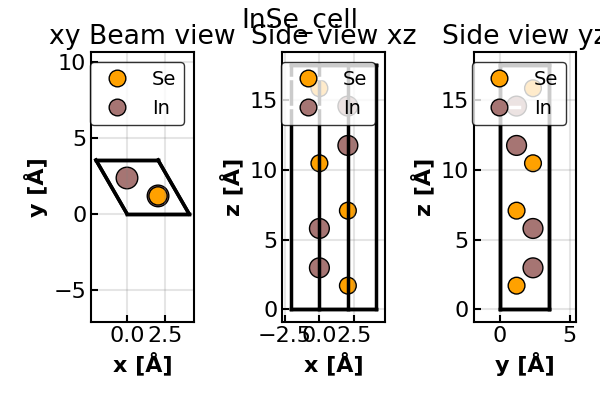

In [4]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSeAtoms, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSeAtoms, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSeAtoms, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_cell')

Text(0.5, 0.98, 'sapphire_cell_01-10')

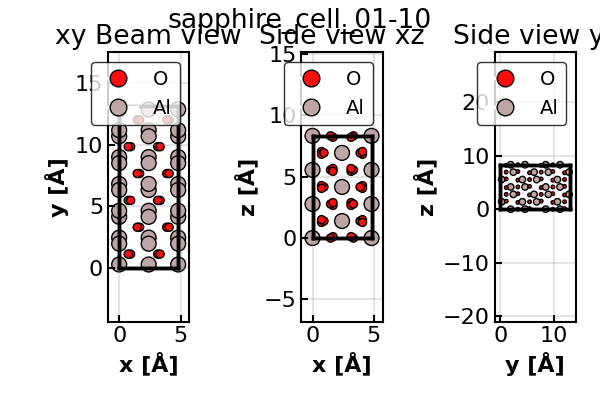

In [5]:
#change to the correct zone axis
Al2O3_01_10 = ase.build.surface(Al2O3Atoms, indices=(1, 0, 0), layers=2, periodic=True)
Al2O3_01_10.translate((0, Al2O3_01_10.cell.lengths()[1] / 2, 0))
Al2O3_01_10.wrap()

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('sapphire_cell_01-10')


Text(0.5, 0.98, 'InSe_[10-10]')

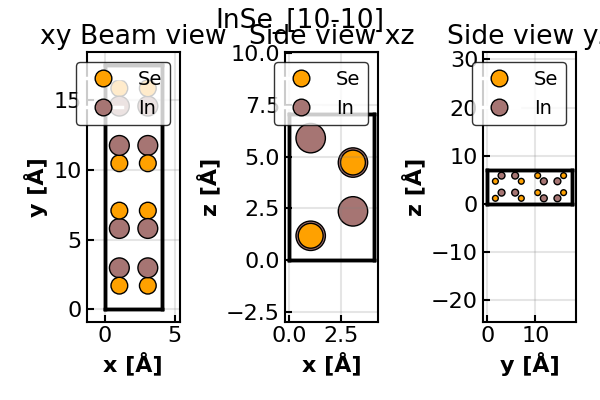

In [6]:
#change to the correct zone axis
InSe_cell_10_10 = ase.build.surface(InSeAtoms, indices=(1, 0, 0), layers=2, periodic=True)
InSe_cell_10_10.translate((-1, InSe_cell_10_10.cell.lengths()[1] / 2, 0))
InSe_cell_10_10.wrap()

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSe_cell_10_10, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSe_cell_10_10, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSe_cell_10_10, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_[10-10]')

In [7]:
#close to 4/5 ratio --> use for x,z --> fixed to 4/4 match STEM image
x_stretch_factor = Al2O3_01_10.cell.lengths()[0]/InSe_cell_10_10.cell.lengths()[0]
print(x_stretch_factor)

#closest 2.5 --> 5/2 ratio --> fixed to 6/2 to have same strain in other direction - other idea elongation for compensation
z_stretch_factor = Al2O3_01_10.cell.lengths()[2]/InSe_cell_10_10.cell.lengths()[2]
print(z_stretch_factor)

1.176658102554275
1.1766581025542753


In [10]:
6*x_stretch_factor

7.05994861532565

Text(0.5, 0.98, 'InSe_cell_10_10Repeated')

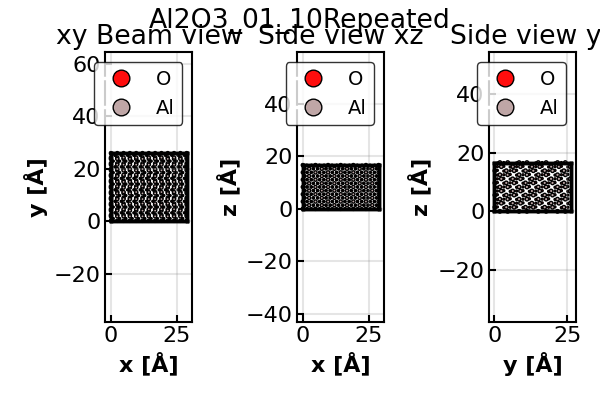

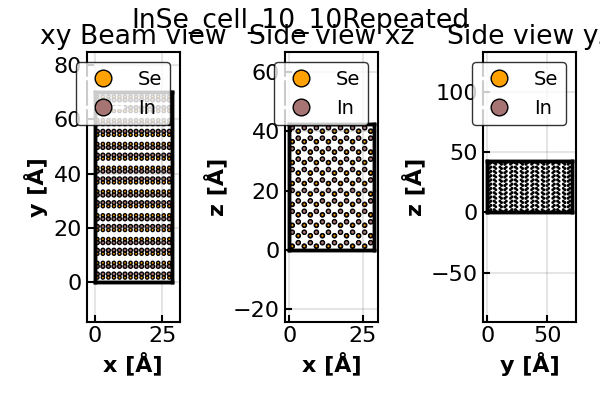

In [11]:
#repeat the cell as much as needed
Al2O3_01_10Repeated = Al2O3_01_10*(6,2,2) # 6 times 
InSe_cell_10_10Repeated = InSe_cell_10_10*(7,4,6) # 7 times to reduce strain to accaptable range 

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated')

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSe_cell_10_10Repeated, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSe_cell_10_10Repeated, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSe_cell_10_10Repeated, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_cell_10_10Repeated')


In [12]:
## replace top layers of Sapphire
Al2O3_01_10Repeated_ReplacedIn = Al2O3_01_10Repeated.copy()

#mask all Al atoms
mask_Al = Al2O3_01_10Repeated_ReplacedIn.numbers == 13

#select atoms near surface
mask_Al_surface = Al2O3_01_10Repeated_ReplacedIn.positions[:, 1] > Al2O3_01_10Repeated_ReplacedIn.cell[1, 1] / 1.25

#combine masks

mask_Al_combined = mask_Al*mask_Al_surface

## replace
Al2O3_01_10Repeated_ReplacedIn.numbers[mask_Al_combined] = 49



Text(0.5, 0.98, 'Al2O3_01_10Repeated_ReplacedIn')

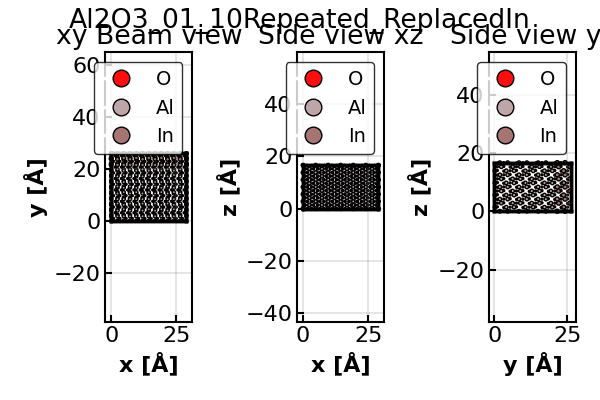

In [13]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedIn, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedIn, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedIn, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated_ReplacedIn')

Text(0.5, 0.98, 'Al2O3_01_10Repeated_ReplacedIn')

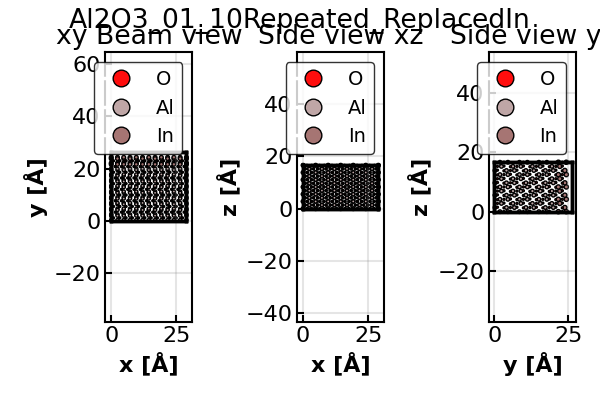

In [14]:
## cut and add InSe ontop
Al2O3_01_10Repeated_ReplacedInCutted = Al2O3_01_10Repeated_ReplacedIn.copy()

mask = Al2O3_01_10Repeated_ReplacedInCutted.positions[:, 1] > 25
# # deletion *requires* providing the indices, i.e. boolean indexing does not work
del Al2O3_01_10Repeated_ReplacedInCutted[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCutted, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCutted, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCutted, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated_ReplacedIn')

Text(0.5, 0.98, 'Al2O3_01_10Repeated_ReplacedInCuttedRefined')

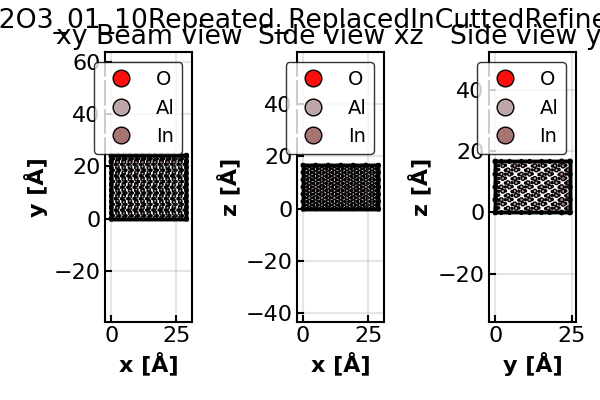

In [15]:
## optimize cell boundary to include the Van der Waals Gap properly

Al2O3_01_10Repeated_ReplacedInCuttedRefined = Al2O3_01_10Repeated_ReplacedInCutted.copy()

InSeVdWGap = 4.13557


x = Al2O3_01_10Repeated_ReplacedInCuttedRefined.cell[0][0]
y = Al2O3_01_10Repeated_ReplacedInCuttedRefined.positions.max(axis=0)[1] #+ InSeVdWGap/2 #limit to max Al position and add half InSe VdW Gap
z = Al2O3_01_10Repeated_ReplacedInCuttedRefined.cell[2][2]


Al2O3_01_10Repeated_ReplacedInCuttedRefined.set_cell([x,y,z])



#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCuttedRefined, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCuttedRefined, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInCuttedRefined, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated_ReplacedInCuttedRefined')


Text(0.5, 0.98, 'InSe_on_sapphire')

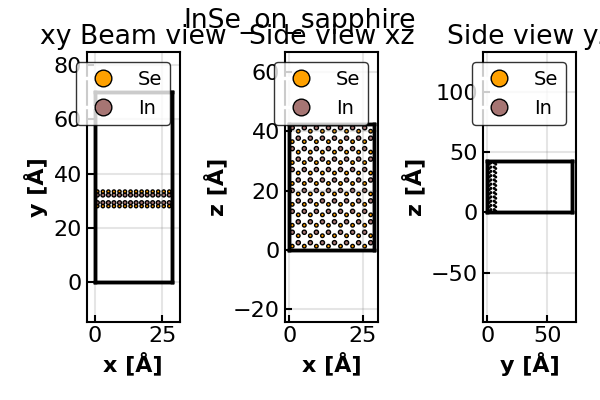

In [17]:
## modify InSe layer --> shift each layer by 1/3 of the In-In Distance

distanceInIn = 4.08362/2 #in Ang

InSe_cell_10_10RepeatedandTranslated = InSe_cell_10_10Repeated.copy()

#layer 1
maskLayer1 = (0 < InSe_cell_10_10RepeatedandTranslated.positions[:, 1]) & ( InSe_cell_10_10RepeatedandTranslated.positions[:, 1] < 9)
InSeLayer1 = InSe_cell_10_10RepeatedandTranslated[np.where(maskLayer1)[0]]
# InSeLayer1.translate([1, 0 ,0])


#layer 2
maskLayer2 = (9 < InSe_cell_10_10RepeatedandTranslated.positions[:, 1]) & ( InSe_cell_10_10RepeatedandTranslated.positions[:, 1] < 18)
InSeLayer2 = InSe_cell_10_10RepeatedandTranslated[np.where(maskLayer2)[0]]
InSeLayer2.translate([distanceInIn/3, 0 ,0])

#layer 3
maskLayer3 = (18 < InSe_cell_10_10RepeatedandTranslated.positions[:, 1]) & ( InSe_cell_10_10RepeatedandTranslated.positions[:, 1] < 27)
InSeLayer3 = InSe_cell_10_10RepeatedandTranslated[np.where(maskLayer3)[0]]
InSeLayer3.translate([2*distanceInIn/3, 0 ,0])

#layer 4
maskLayer4 = (27 < InSe_cell_10_10RepeatedandTranslated.positions[:, 1]) & ( InSe_cell_10_10RepeatedandTranslated.positions[:, 1] < 36)
InSeLayer4 = InSe_cell_10_10RepeatedandTranslated[np.where(maskLayer4)[0]]
# InSeLayer3.translate([1, 0 ,0])

# InSe_cell_10_10RepeatedandTranslated.translate([.5, 0 ,0])


#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSeLayer4, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSeLayer1, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSeLayer1, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_on_sapphire')



Text(0.5, 0.98, 'InSeWithStacking')

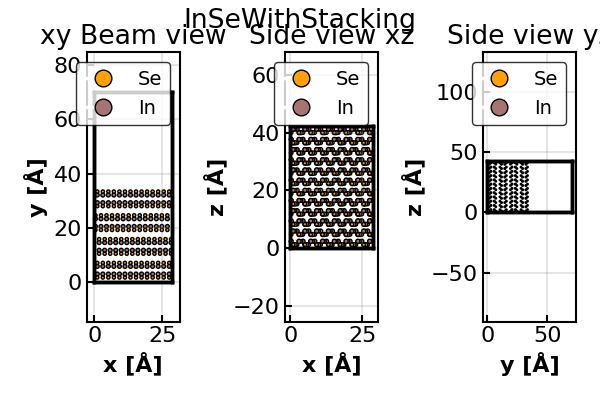

In [18]:
## stack InSe 
InSeWithStacking = InSeLayer1+InSeLayer2+InSeLayer3+InSeLayer4

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSeWithStacking, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSeWithStacking, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSeWithStacking, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSeWithStacking')


Text(0.5, 0.98, 'InSeWithStacking')

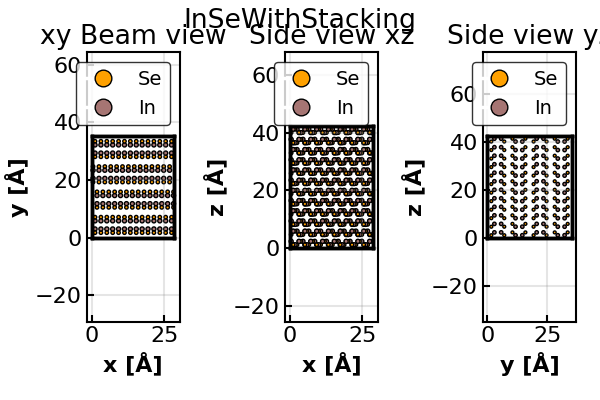

In [19]:
## reduce cell size

x = InSeWithStacking.cell[0][0]
y = InSe_cell_10_10.cell[1][1]*2 #twice as large as original
z = InSeWithStacking.cell[2][2]


InSeWithStacking.set_cell([x,y,z])

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSeWithStacking, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSeWithStacking, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSeWithStacking, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSeWithStacking')


[  28.70775957   69.38839173 1043.75783064]


Text(0.5, 0.98, 'InSe_on_sapphire')

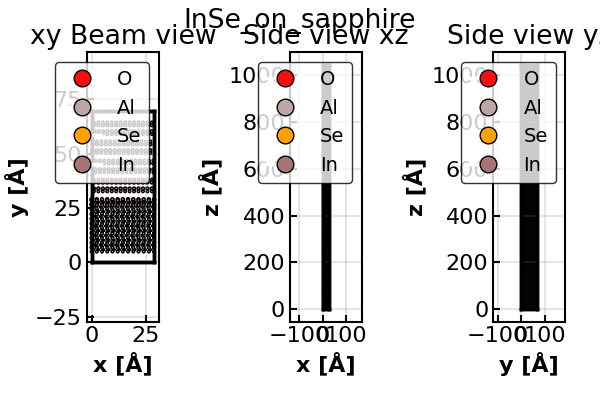

In [20]:
## Stack InSe ontop


########## heterostructure
InSe_on_sapphire = ase.build.stack(Al2O3_01_10Repeated_ReplacedInCutted,InSeWithStacking, axis = 1, maxstrain=100)

#make thick in z direction
InSe_on_sapphire = InSe_on_sapphire*(1,1,35) ## make about 100 nm thick

#add vacuum on top and bottom

InSe_on_sapphire.center(axis=2, vacuum=5)

#add vacuum on in y direction
InSe_on_sapphire.center(axis=1, vacuum=5)

## verify the cell thickness
print(InSe_on_sapphire.cell.lengths())

## plot the cell

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(InSe_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(InSe_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(InSe_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_on_sapphire')


In [22]:
## save modified sapphire cell to CIF
fsf = 'ModifiedCIFs'
InSe_on_sapphire.write(os.path.join(fpCIF,fsf, 'InSeOnSapphireSimulationCell100nm.cif'))
InSe_on_sapphire.write(os.path.join(fpCIF,fsf, 'InSeOnSapphireSimulationCell100nm.xyz'))
print("Atom Structure saved")




Atom Structure saved


#### Unused old stuff below

In [11]:
## replace top layers of Sapphire
Al2O3_01_10Repeated_ReplacedInAndSe = Al2O3_01_10Repeated_ReplacedIn.copy()

#mask all Al atoms
mask_O = Al2O3_01_10Repeated_ReplacedInAndSe.numbers == 8

#select atoms near surface
mask_O_surface = Al2O3_01_10Repeated_ReplacedInAndSe.positions[:, 1] > Al2O3_01_10Repeated_ReplacedInAndSe.cell[1, 1] / 1.1

#combine masks

mask_O_combined = mask_O*mask_O_surface

## replace
Al2O3_01_10Repeated_ReplacedInAndSe.numbers[mask_O_combined] = 34



Text(0.5, 0.98, 'Al2O3_01_10Repeated_ReplacedInAndSe')

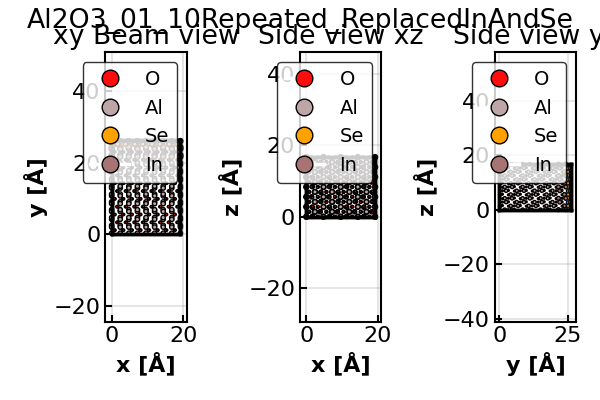

In [12]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInAndSe, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInAndSe, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated_ReplacedInAndSe, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated_ReplacedInAndSe')

In [58]:
## save modified sapphire cell to CIF
fsf = 'ModifiedCIFs'
Al2O3_01_10Repeated_ReplacedInAndSe.write(os.path.join(fpCIF,fsf, 'Al2O3_with_InSe_surface.cif'))

/home/massmeye/.conda/envs/py4DSTEMnewVersion/lib/python3.11/site-packages/ase/io/cif.py:834: UserWarning: Occupancies present but no occupancy info for "{symbol}"
  warnings.warn(str(err))


0.8007327995000001
0.6162800000000002


Text(0.5, 0.98, 'repeated_GaS_cell_2_10_cutted')

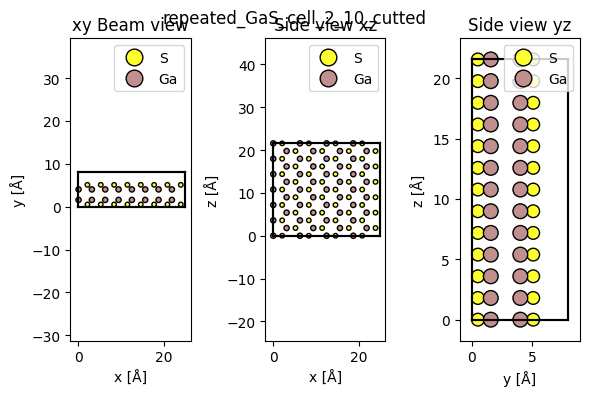

In [66]:
#cut GaS cell - we only need a ML
repeated_GaS_cell_2_10_cutted = repeated_GaS_cell_2_10.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] > repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
# deletion *requires* providing the indices, i.e. boolean indexing does not work
del repeated_GaS_cell_2_10_cutted[np.where(mask)[0]]

#translate cell
# repeated_GaS_cell_2_10_cutted.translate((0, -repeated_GaS_cell_2_10_cutted.cell.lengths()[1] / 2, 0))
# repeated_GaS_cell_2_10_cutted.translate((-1.046018333333333, -repeated_GaS_cell_2_10_cutted.cell.lengths()[1] / 20, 0))
print(repeated_GaS_cell_2_10_cutted.cell.lengths()[1] / 20)
print((3.11628-2.5))
repeated_GaS_cell_2_10_cutted.translate((-1.046018333333333, -1.2, 0))

#set new cell boundaries
repeated_GaS_cell_2_10_cutted.set_cell(repeated_GaS_cell_2_10_cutted.cell.lengths()/[1, 2, 1])

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10_cutted, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10_cutted')


Text(0.5, 0.98, 'repeated_sapphire_cell_with_Ga_layer')

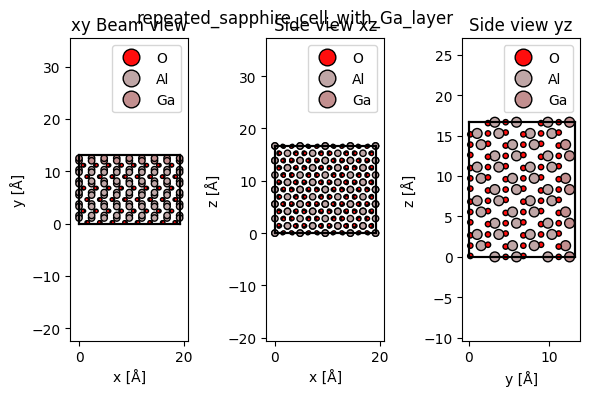

In [78]:
#modify first Al layer of sapphire
repeated_sapphire_cell_with_Ga_layer = repeated_sapphire_cell.copy()

#need translation
repeated_sapphire_cell_with_Ga_layer.translate((0, repeated_sapphire_cell_with_Ga_layer.cell.lengths()[1] / 10, 0))
repeated_sapphire_cell_with_Ga_layer.wrap()

#mask al atoms
mask_al = repeated_sapphire_cell_with_Ga_layer.numbers == 13

#select only first al layer
mask_al_first_layer = repeated_sapphire_cell_with_Ga_layer.positions[:, 1] > repeated_sapphire_cell_with_Ga_layer.cell.lengths()[1] - repeated_sapphire_cell_with_Ga_layer.cell.lengths()[1]/7

#combine
mask_al_combined = mask_al*mask_al_first_layer

#assign new atomic number
repeated_sapphire_cell_with_Ga_layer.numbers[mask_al_combined] = 31

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_sapphire_cell_with_Ga_layer, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_sapphire_cell_with_Ga_layer, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_sapphire_cell_with_Ga_layer, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_sapphire_cell_with_Ga_layer')

In [131]:
########## heterostructure
GaS_on_sapphire = ase.build.stack(repeated_sapphire_cell_with_Ga_layer,repeated_GaS_cell_2_10_cutted, axis = 1, maxstrain=100)

#make thick in z direction
GaS_on_sapphire = GaS_on_sapphire*(1,1,50)

#add vacuum on top and bottom

GaS_on_sapphire.center(axis=2, vacuum=5)

#add vacuum on in y direction
GaS_on_sapphire.center(axis=1, vacuum=5)

print(GaS_on_sapphire.cell.lengths())


[ 22.05742842  27.99379342 964.98483036]


Text(0.5, 0.98, 'GaS_on_sapphire_z_cut')

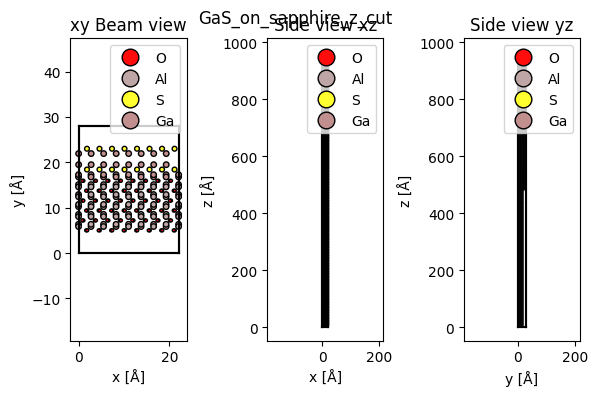

In [151]:
# delete part to create thinner GaS film

#modify first Al layer of sapphire
GaS_on_sapphire_z_cut = GaS_on_sapphire.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask1 = GaS_on_sapphire_z_cut.positions[:, 2] < GaS_on_sapphire_z_cut.cell.lengths()[2]/2
mask2 = GaS_on_sapphire_z_cut.positions[:, 1] > GaS_on_sapphire_z_cut.cell.lengths()[1]/1.6
mask = mask1*mask2

# deletion *requires* providing the indices, i.e. boolean indexing does not work
del GaS_on_sapphire_z_cut[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire_z_cut, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire_z_cut, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire_z_cut, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('GaS_on_sapphire_z_cut')



In [152]:
#cutted
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_GaS_cut_angstrom.cif',GaS_on_sapphire_z_cut)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_GaS_cut_angstrom.xyz',GaS_on_sapphire_z_cut)
print("Atom Structure saved")
# #convert A to nm
GaS_on_sapphire_z_cut.positions = GaS_on_sapphire_z_cut.positions/10
GaS_on_sapphire_z_cut.cell = GaS_on_sapphire_z_cut.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_GaS_cut.cif',GaS_on_sapphire_z_cut)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_GaS_cut.xyz',GaS_on_sapphire_z_cut)
print("Atom Structure saved")

Occupancies present but no occupancy info for "{symbol}"


Atom Structure saved
Atom Structure saved


Occupancies present but no occupancy info for "{symbol}"


Text(0.5, 0.98, 'GaS_on_sapphire full structure')

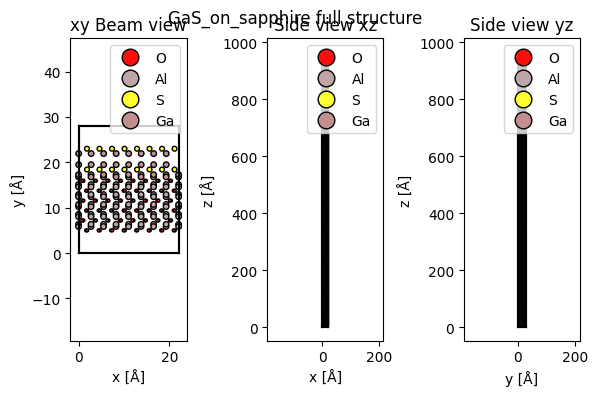

In [104]:
#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('GaS_on_sapphire full structure')

In [70]:
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_angstrom.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_angstrom.xyz',GaS_on_sapphire)
print("Atom Structure saved")



Atom Structure saved


Occupancies present but no occupancy info for "{symbol}"


In [11]:
## export sapphir cell for Plasmon Simulations

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/CIF_Files/sapphire_cell_100.cif',sapphire_cell_100)

In [71]:
#export the cell to cif and x,y,z file - nm

# #convert A to nm
GaS_on_sapphire.positions = GaS_on_sapphire.positions/10
GaS_on_sapphire.cell = GaS_on_sapphire.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_nm.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_nm.xyz',GaS_on_sapphire)
print("Atom Structure saved")

Atom Structure saved


Occupancies present but no occupancy info for "{symbol}"


Text(0.5, 0.98, 'repeated_GaS_cell_2_10_cutted')

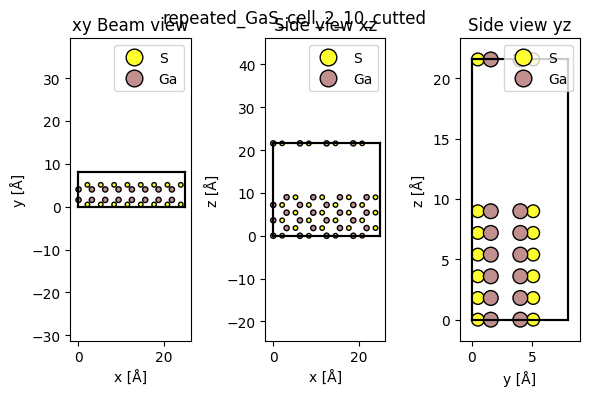

In [94]:
#reduce Thickness of GaS - 1/2
repeated_GaS_cell_2_10_cutted_z = repeated_GaS_cell_2_10_cutted.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask = repeated_GaS_cell_2_10_cutted_z.positions[:, 2] > repeated_GaS_cell_2_10_cutted_z.cell.lengths()[2]/2 -1
# deletion *requires* providing the indices, i.e. boolean indexing does not work
del repeated_GaS_cell_2_10_cutted_z[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10_cutted')

[ 22.05742842  27.99379342 964.98483036]


Text(0.5, 0.98, 'GaS_on_sapphire full structure')

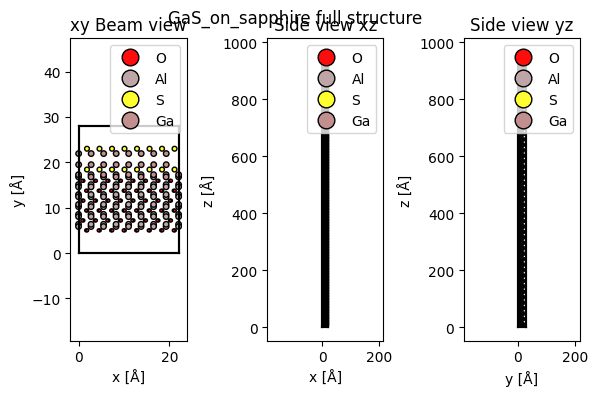

In [95]:
########## heterostructure - z cut
GaS_on_sapphire = ase.build.stack(repeated_sapphire_cell_with_Ga_layer,repeated_GaS_cell_2_10_cutted_z, axis = 1, maxstrain=100)

#make thick in z direction
GaS_on_sapphire = GaS_on_sapphire*(1,1,50)

#add vacuum on top and bottom

GaS_on_sapphire.center(axis=2, vacuum=5)

#add vacuum on in y direction
GaS_on_sapphire.center(axis=1, vacuum=5)

print(GaS_on_sapphire.cell.lengths())

#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('GaS_on_sapphire full structure')


In [96]:
#cutted
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_angstrom.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_angstrom.xyz',GaS_on_sapphire)
print("Atom Structure saved")
# #convert A to nm
GaS_on_sapphire.positions = GaS_on_sapphire.positions/10
GaS_on_sapphire.cell = GaS_on_sapphire.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_nm.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_nm.xyz',GaS_on_sapphire)
print("Atom Structure saved")

Occupancies present but no occupancy info for "{symbol}"


Atom Structure saved
Atom Structure saved


Occupancies present but no occupancy info for "{symbol}"


Text(0.5, 0.98, 'repeated_GaS_cell_2_10_cutted')

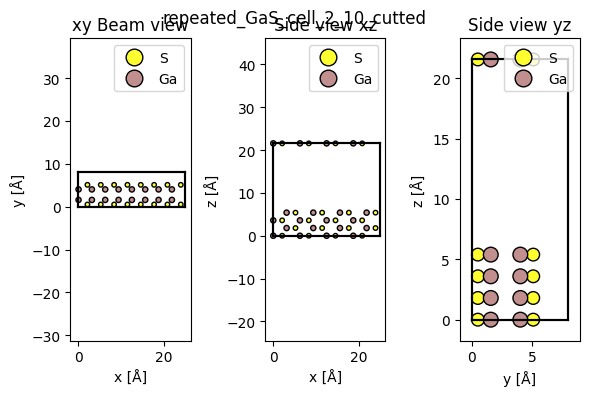

In [97]:
# Thickness: 1/3 of sapphire
#reduce Thickness of GaS
repeated_GaS_cell_2_10_cutted_z = repeated_GaS_cell_2_10_cutted.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask = repeated_GaS_cell_2_10_cutted_z.positions[:, 2] > repeated_GaS_cell_2_10_cutted_z.cell.lengths()[2]/3 -1
# deletion *requires* providing the indices, i.e. boolean indexing does not work
del repeated_GaS_cell_2_10_cutted_z[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10_cutted')


[ 22.05742842  27.99379342 964.98483036]


Text(0.5, 0.98, 'GaS_on_sapphire full structure')

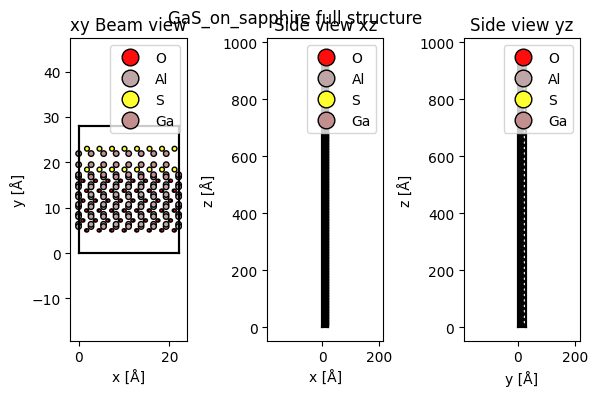

In [98]:
########## heterostructure - z cut
GaS_on_sapphire = ase.build.stack(repeated_sapphire_cell_with_Ga_layer,repeated_GaS_cell_2_10_cutted_z, axis = 1, maxstrain=100)

#make thick in z direction
GaS_on_sapphire = GaS_on_sapphire*(1,1,50)

#add vacuum on top and bottom

GaS_on_sapphire.center(axis=2, vacuum=5)

#add vacuum on in y direction
GaS_on_sapphire.center(axis=1, vacuum=5)

print(GaS_on_sapphire.cell.lengths())

#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('GaS_on_sapphire full structure')

In [99]:
#cutted
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_3_angstrom.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_3_angstrom.xyz',GaS_on_sapphire)
print("Atom Structure saved")
# #convert A to nm
GaS_on_sapphire.positions = GaS_on_sapphire.positions/10
GaS_on_sapphire.cell = GaS_on_sapphire.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_3_nm.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_3_nm.xyz',GaS_on_sapphire)
print("Atom Structure saved")

Occupancies present but no occupancy info for "{symbol}"
Occupancies present but no occupancy info for "{symbol}"


Atom Structure saved
Atom Structure saved


Text(0.5, 0.98, 'repeated_GaS_cell_2_10_cutted')

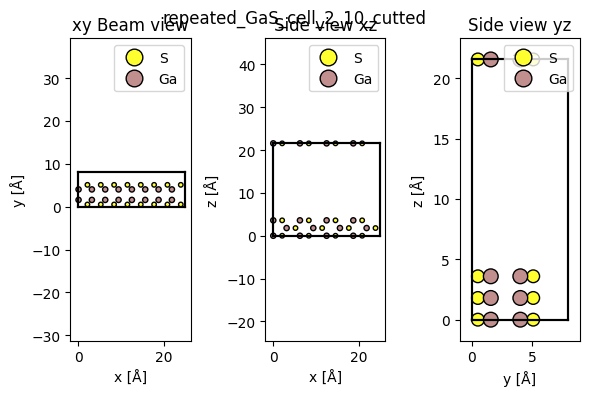

In [100]:
# Thickness: 1/4 of sapphire
#reduce Thickness of GaS
repeated_GaS_cell_2_10_cutted_z = repeated_GaS_cell_2_10_cutted.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask = repeated_GaS_cell_2_10_cutted_z.positions[:, 2] > repeated_GaS_cell_2_10_cutted_z.cell.lengths()[2]/4 -1
# deletion *requires* providing the indices, i.e. boolean indexing does not work
del repeated_GaS_cell_2_10_cutted_z[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10_cutted')

[ 22.05742842  27.99379342 964.98483036]


Text(0.5, 0.98, 'GaS_on_sapphire full structure')

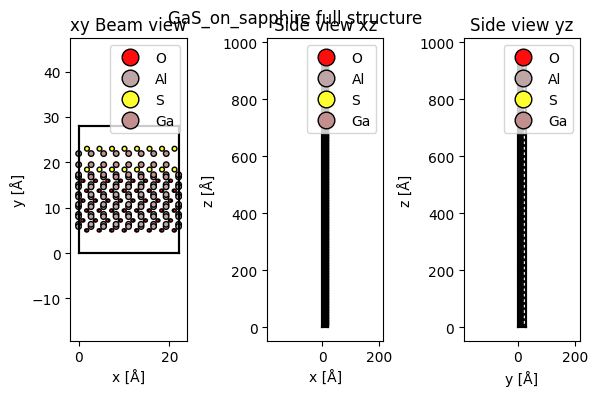

In [101]:
########## heterostructure - z cut
GaS_on_sapphire = ase.build.stack(repeated_sapphire_cell_with_Ga_layer,repeated_GaS_cell_2_10_cutted_z, axis = 1, maxstrain=100)

#make thick in z direction
GaS_on_sapphire = GaS_on_sapphire*(1,1,50)

#add vacuum on top and bottom

GaS_on_sapphire.center(axis=2, vacuum=5)

#add vacuum on in y direction
GaS_on_sapphire.center(axis=1, vacuum=5)

print(GaS_on_sapphire.cell.lengths())

#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('GaS_on_sapphire full structure')

In [102]:
#cutted
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_4_angstrom.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_4_angstrom.xyz',GaS_on_sapphire)
print("Atom Structure saved")
# #convert A to nm
GaS_on_sapphire.positions = GaS_on_sapphire.positions/10
GaS_on_sapphire.cell = GaS_on_sapphire.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_4_nm.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_4_nm.xyz',GaS_on_sapphire)
print("Atom Structure saved")

Occupancies present but no occupancy info for "{symbol}"
Occupancies present but no occupancy info for "{symbol}"


Atom Structure saved
Atom Structure saved
